<a href="https://colab.research.google.com/github/NavedAFZ/deep-learning/blob/master/Hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
! unzip "/content/gdrive/My Drive/kaggle/padhai-hindi-vow-cons-classification.zip" -d "/content/gdrive/My Drive/kaggle"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms

#For converting the dataset to torchvision dataset format
class VowelConsonantDataset(Dataset):
    def __init__(self, file_path,train=True,transform=None):
        self.transform = transform
        self.file_path=file_path
        self.train=train
        self.file_names=[file for _,_,files in os.walk(self.file_path) for file in files]
        self.len = len(self.file_names)
        if self.train:
            self.classes_mapping=self.get_classes()
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, index):
        file_name=self.file_names[index]
        image_data=self.pil_loader(self.file_path+"/"+file_name)
        if self.transform:
            image_data = self.transform(image_data)
        if self.train:
            file_name_splitted=file_name.split("_")
            Y1 = self.classes_mapping[file_name_splitted[0]]
            Y2 = self.classes_mapping[file_name_splitted[1]]
            z1,z2=torch.zeros(10),torch.zeros(10)
            z1[Y1-10],z2[Y2]=1,1
            label=torch.stack([z1,z2])

            return image_data, label

        else:
            return image_data, file_name
          
    def pil_loader(self,path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

      
    def get_classes(self):
        classes=[]
        for name in self.file_names:
            name_splitted=name.split("_")
            classes.extend([name_splitted[0],name_splitted[1]])
        classes=list(set(classes))
        classes_mapping={}
        for i,cl in enumerate(sorted(classes)):
            classes_mapping[cl]=i
        return classes_mapping
    

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

In [0]:
transform = transforms.Compose([
    transforms.ToTensor()])

In [0]:
batch_size=120

In [0]:
full_data = VowelConsonantDataset("/content/gdrive/My Drive/kaggle/train/train",train=True,transform=transform)
train_size = int(0.9 * len(full_data))
test_size = len(full_data) - train_size

train_data, validation_data = random_split(full_data, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size, shuffle=True)

In [0]:


dataiter = iter(validation_loader)
images, labels = dataiter.next()
in1=len(images)
label=labels.reshape(in1,-1)


In [158]:
print(images.shape)

torch.Size([120, 3, 64, 64])


In [161]:
print(images[0].shape)
print(label.shape)

torch.Size([3, 64, 64])
torch.Size([120, 20])


In [160]:
for x in label:
  print(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])
tensor([0., 0., 0., 0., 0., 0.

In [0]:
a1={}
a1=full_data.get_classes()

In [117]:
print(a1)

{'C0': 0, 'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'V0': 10, 'V1': 11, 'V2': 12, 'V3': 13, 'V4': 14, 'V5': 15, 'V6': 16, 'V7': 17, 'V8': 18, 'V9': 19}


In [0]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img,title="a")
    #, title=[str(x.item()) for x in labels]

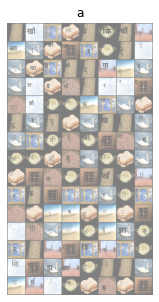

In [120]:
#for i in range(4):
show_batch_images(train_loader)

In [0]:
import torch.nn as nn


class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 64, 64) -> (N,  6, 60, 60)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N,  6, 60, 60) -> (N,  6, 30, 30)
            nn.Conv2d(6, 16, 5),        # (N,  6, 30, 30) -> (N, 16, 26, 26)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),   # (N, 16, 26, 26) -> (N, 16, 13, 13)
            nn.Conv2d(16, 10, 5),         # (N, 16, 13, 13) -> (N,  10, 9, 9)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=1),  # (N,  6, 60, 60) -> (N,  10, 8, 8)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(640,120),         # (N, 640) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 20)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [163]:
net = LeNet()
out = net(images)
#out1=out.reshape(120,2,-1)

torch.Size([120, 3, 64, 64])
torch.Size([120, 10, 8, 8])
torch.Size([120, 640])
torch.Size([120, 20])


In [0]:
_,la1=torch.max(labels.data, 2)
print(la1.shape)
print(labels)
print(la1)

In [0]:
# for vovels
def final_evaluation(dataloader):
  total, correct = 0, 0
  for data in validation_loader:
          inputs, labels = data             #labels=N*2*10
                                            #input=N*3*64*64

          
          outputs = net(inputs)              #(N*10)
          _,la1=torch.max(labels.data, 2)    #(N)

          """  0 :vovels
               1: consonent  """                                   
          a1=divide(labels,0)                #(N*10)         
          print(a1.shape)
          _,pred=torch.max(a1.data, 1)       #(N)
          print(pred.shape)
          

          total += labels.size(0)
          correct += (pred == la1).sum().item()
  return 100 * correct / total

In [140]:
print(total,correct)

1000 182


In [0]:
"""def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)

        out1=outputs.reshape(outputs[0],2,-1)
        _, pred = torch.max(out1.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total


In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [169]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 5

for epoch in range(max_epochs):

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inp=len(inputs)
        
        opt.zero_grad()

        outputs1 = net_vovel(inputs)       #(netvovel::for vovels)
        outputs2 = net_conso(inputs)       #(netconsonents::for consonents)
        
        a1=divide(labels,0)         #for vovels   shape:N*10
        _,pred1=torch.max(a1.data, 1)
        print(a1.shape)             #shape:N
        
        a2=divide(labels,1)         #for consonents   shape:N*10
        _,pred2=torch.max(a2.data, 1)
        print(a2.shape)             #shape:N
        loss1 = loss_fn(outputs1, pred1)   #for vovels 
        loss2 = loss_fn(outputs2, pred2)   #for consonents
        loss1.backward()
        loss2.backward()
       opt.step()
        
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    #print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

torch.Size([120, 3, 64, 64]) torch.Size([120, 20])
torch.Size([120, 3, 64, 64])
torch.Size([120, 10, 8, 8])
torch.Size([120, 640])
torch.Size([120, 20])
torch.Size([120, 20])
torch.Size([120])
a
b
c
torch.Size([120, 3, 64, 64]) torch.Size([120, 20])
torch.Size([120, 3, 64, 64])
torch.Size([120, 10, 8, 8])
torch.Size([120, 640])
torch.Size([120, 20])
torch.Size([120, 20])
torch.Size([120])
a
b
c
torch.Size([120, 3, 64, 64]) torch.Size([120, 20])
torch.Size([120, 3, 64, 64])
torch.Size([120, 10, 8, 8])
torch.Size([120, 640])
torch.Size([120, 20])
torch.Size([120, 20])
torch.Size([120])
a
b
c
torch.Size([120, 3, 64, 64]) torch.Size([120, 20])
torch.Size([120, 3, 64, 64])
torch.Size([120, 10, 8, 8])
torch.Size([120, 640])
torch.Size([120, 20])
torch.Size([120, 20])
torch.Size([120])
a
b
c
torch.Size([120, 3, 64, 64]) torch.Size([120, 20])
torch.Size([120, 3, 64, 64])
torch.Size([120, 10, 8, 8])
torch.Size([120, 640])
torch.Size([120, 20])
torch.Size([120, 20])
torch.Size([120])
a
b
c
torch

KeyboardInterrupt: ignored

In [0]:
def divide(labels,m):
  A=labels.shape[0]
  B=labels.shape[1]
  C=labels.shape[2]
  a1=torch.zeros(A,C)
  a2=torch.zeros(A,C)
  for i in range(A):
    for j in range(B):
      for k in range(C):
        if j==0:
          a1[i][k]=labels[i][0][k]
        elif j==1:
          a2[i][k]=labels[i][1][k]
  if m==0:
    return a1
  elif m==1:
    return a2  

In [177]:
for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        inp=len(inputs)
        
        a1=divide(labels,0)
        print(a1.shape)
        _,pred=torch.max(a1.data, 1)
        print(pred.shape)




torch.Size([120, 10])
torch.Size([120])


KeyboardInterrupt: ignored